In [66]:
import numpy as np
import matplotlib.pyplot as plt

### Definition du problème
Soit $\begin{array}{ccccc}
g & : & (\R^3)^n & \to & R \\
 & & (p_1, ..., p_n) & \mapsto &  \sum_i {\lVert p_{i+1} - R_i p_i - p_i\rVert} + \gamma \sum_{i,j} {\lVert p_{i} - R_j p_j - p_j\rVert} \\
\end{array}$
Avec la notation :$$ \forall i \in [1,n], p_i = \begin{pmatrix}
x_i \\[3mm]
y_i \\[3mm]
\theta_i \\
\end{pmatrix}$$
on peut définir la fonction $f$ par:
$\begin{array}{ccccc}
g & : & (\R)^{3n} & \to & R \\
 & & (x_1,...,x_n,y_1,..., y_n, \theta_1,..., \theta_n) & \mapsto &  \sum_i {\lVert p_{i+1} - R_i p_i - p_i\rVert} + \gamma \sum_{i,j} {\lVert p_{i} - R_j p_j - p_j\rVert} \\
\end{array}$
On notera $(e_i)_{i \in [1,3]}$ la base canonique de $\R^3$ et $(b_i)_{i \in [1,3n]}$ celle de $R^{3n}$
Ainsi, en définissant l'isomorphisme $h$ par:
$\begin{array}{ccccc}
h & : & (\R^3)^n & \to &(\R)^{3n} \\
 & & x & \mapsto & \sum_i {\sum_j {(x \cdot e_j) b_{nj + i}}} \\
\end{array}$, c'est à dire l'isomorphisme vérifiant, avec les notations précédentes $$\forall (p_1, ..., p_n) \in (\R^3)^n, h(p_1, ..., p_n) = (x_1,...,x_n,y_1,..., y_n, \theta_1,..., \theta_n) $$, on a ainsi:
$$ g = f \circ h$$
Minimiser g revient donc, à l'isomorphisme h près, à minimiser f.
On s'intéressera par la suite préférentiellement à la fonction f, car la forme de son argument s'inscrit mieux dans le cadre du cours, et on pourra calculer son gradient.




## Contraintes:
Intéressons nous maintenant aux contraintes. 
Les contraintes du problèmes sont :
$$\forall i \in [1,n], \left\{   \begin{array}{ll}
        \theta_i - \frac {pi}{2} <0 \\
        -\theta_i - \frac {pi}{2}<0
    \end{array}
\right.$$
On définit les fonctions $c_{i,k}$ par, avec les notations précédentes,
$$\forall i,k \in [1,n] x [0,1], \forall z in \R^{3n},  c_{i,k}(z) = (z \cdot b_{2n + i}) - \frac {pi}{2}$$
On peut alors définir le vecteur de fonctions $c$ tel que :
$$c = \begin {pmatrix}
    c_{1,0} \\
    c_{1,1} \\
    ... \\
    c_{n,0} \\
    c_{n,1} 

    \end {pmatrix}$$
Les contraintes se réecrivent donc mathématiquement par : $$c(z) <0$$

On va donc rechercher la solution du problème d'optimisation sous contraintes:
$$\left\{
 \begin {array}{ll}
 \min_{z \in R^{3n}} \\
 c(z) < 0
 \end {array}
 \right.$$

## Etude de la convexité des fonctions:
On va étudier d'abord la fonction $f$.
On définit:
$$\forall i,p_j \in [1,n] * \R^3, 
\begin{array}{ccccc}
k_i & : & (\R^3) & \to & R \\
 & & (x_i, y_i,\theta_i) & \mapsto &  \lVert p_{i} - R_j p_j - p_j\rVert\\
\end{array}$$
Alors, en tant que composée de fonctions usuelles, $k_i$ est différentiable infiniment partout sauf en 0.
De plus, en mettant cette fonction sous la forme d'un produit scalaire, on s'aperçoit que, partout où elle est définie:
$$ sym(\nabla^2 k_{i,j}) =  I_3$$


$f$ est donc convexe.
Intéressons nous maintenant aux contraintes.
Soit $i,k \in [1,n] * [0,1]$
$$c_{i,k}$$
 est évidemment convexe, puisque elle est deux fois différentiable et que sa hessienne est nulle partout.
Donc, le vecteur  des contrainte $c$ est bien convexe.
De plus, en évaluant c en 0, on se rend compte que $$c(0)<0$$, car $- \frac {\pi}{2} < 0 < \frac {\pi}{2}$ 




## Existence  d'une solution au pb:
Soit $X$ l'ensemble des abscisses du bureau et $Y$ l'ensemble de ses ordonnées. $X$ et $Y$ sont donc fermés et bornés. En notant $\Theta = [-\frac {\pi}{2}, \frac {\pi}{2}]$, lui aussi un ensemble fermé et borné, on a donc:
$$ E = X * Y * \Theta \in R^{3n}$$
$E$ est donc borné et fermé en tant que produit cartésien de tels ensembles.
On a vu que la fonction f est continue sur $\R^3$. Or, on peut se ramener à chercher le minimum de f sur E et non $R^3$, car on se place à l'intérieur des bureaux pour l'étude.
$E$ étant fermé et borné dans un espace de dimension finie, c'est un compact.
f étant continue, l'existence du minimum en découle.


In [68]:
#Récupération des données:
liste_delta_pi_odo = []
dico_delta_pi_boucle = {}
fichier = open('INTEL.txt')
lines = fichier.readlines()
for line in lines:
        line = line.split(' ')
        categorie = line[0]
        i = int(line[1])
        i_suivant = int(line[2])
        dx = float(line[3])
        dy = float(line[4])
        dtheta = float(line[5]) 
        odo = np.array((dx, dy, dtheta))

        if categorie == 'EDGE_ODO':
            liste_delta_pi_odo.append(odo)
        else :
            dico_delta_pi_boucle[str(i) + '->' + str(i_suivant)] = odo
             

    

In [69]:
def construire_Ri(p):
    theta = p[2]
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    Ri = np.array([cos_theta, -sin_theta, 0, sin_theta, cos_theta, 0, 0,0,1])
    Ri = Ri.reshape(3,3)
    return Ri


In [84]:
def premiere_estimation_odo(liste_delta_pi_odo):
    n = len(liste_delta_pi_odo)
    p0 = np.array( (0, 0, 0) )
    listes_p = [p0]
    for i in range(n):
        p_prec = listes_p[-1]
        Ri = construire_Ri(p_prec)
        p_suiv = p_prec + Ri.dot(liste_delta_pi_odo[i])
        listes_p.append(p_suiv)
    return np.array(listes_p)

In [85]:
liste_poses = premiere_estimation_odo(liste_delta_pi_odo)

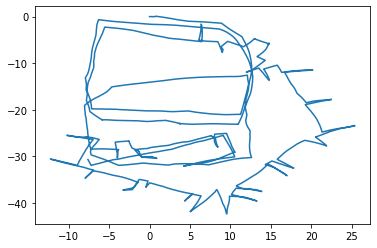

In [86]:
#affichage
x = liste_poses[:,0]
y = liste_poses[:,1]
plt.plot(x,y)

On remarque que l'on parvient bien à une image qui ressemble vaguement aux bureaux d'Intel, mais qui manque de précision. Il va donc nous falloir corriger cela grâce aux données de bouclage et à l'utilisation d'algorithmes d'optimisation.